# Menentukan Akar sebuah Persamaan

Terkadang, dalam kehidupan nyata, kita diminta menemukan suatu nilai yang bila dimasukkan sebuah fungsi akan menghasilkan bilangan tertentu. Atau dengan kata lain, kita diminta mencari nilai $x$ dalam $ f(x) = c $ bila c diketahui. Permasalahan ini bisa diselesaikan dengan menentukan akar suatu persamaan $g(x)=0$ dengan $g(x)=f(x)-c$.

Contoh paling sering kita jumpai adalah persamaan kuadrat. Pada saat SMP, mungkin kita bisa menyelesaikan persamaan kuadrat $ ax^2+bx+c = 0 $ dengan rumus $x_{1,2}= \frac{-b \pm \sqrt{b^2 -4ac}}{2a} $. Kemudian, pada saat SMA, kita menemukan bentuk polinomial yang lebih rumit lagi yang bisa diselesaikan dengan faktorisasi menggunakan metode Horner-Kino atau sebagainya. Penyelesaian secara analitis langsung ini cukup mudah pada beberapa kasus, namun untuk persamaan yang lebih rumit, kita tidak bisa menyelesaikannya secara analitis.

![Contoh akar suatu fungsi](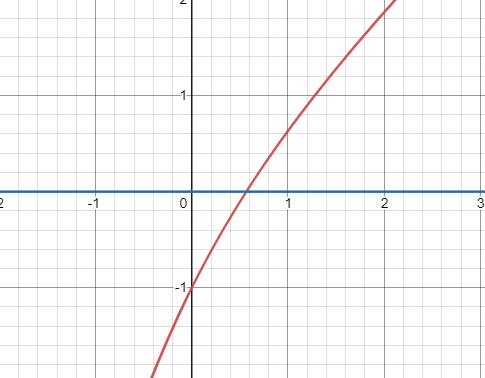
)

Contoh persamaan yang sulit ini adalah $ x- e^{-x} = 0 $, ditunjukkan dengan grafik di atas. Persamaan ini bahkan tidak bisa dicari dengan Photomath. Untuk itu, kita harus menggunakan pendekatan metode numeris untuk menyelesaikan  permasalahan semacam ini.

Untuk mencari akar suatu fungsi secara numerik, terdapat dua jenis metode yang berbeda, yaitu:
1. Bracketing/Closed Method
- Membutuhkan dua titik dugaan awal
- Mudah diterapkan
- Konvergensi terjamin (bila akar di antara dua titik tersebut), tetapi lama
2. Open Method
- Hanya membutuhkan satu titik dugaan awal
- Konvergensi tidak selalu terjamin, tetapi bila benar, pasti dia cepat konvergen

### Menyiapkan library

Seperti biasa, kita akan menyiapkan library yang diperlukan, yaitu numpy, pandas, dan matplotlib.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Menggambarkan grafik fungsi
def showGraph(result, range, function):
    x = np.arange(result-range, result+range, 0.01)
    y = function(x)
    y1 = 0
    plt.clf()
    plt.plot(x, y)
    plt.plot(x, 0/x)
    plt.grid()
    plt.show()

Selain itu, kita juga perlu memasukkan fungsi yang ingin kita cari akarnya

Misalnya kita ingin mencari $ x^2 +4x-12=0 $

In [ ]:
def f(x):
    return x**2 + 4*x - 12

### Bisection Method

Algoritma Bisection mencari titik tengah kedua dugaan sebagai dugaan.

Langkah mencari:

0. Tentukan toleransi serta $x_{low}$ dan $x_{high}$ sebagai dugaan awal
1. Hitung titik tengah $x_{mid}$ dengan $x_{mid}=\frac{x_{low} + x_{high}}{2}$
2. Hitung nilai $f(x_{low}).f(x_{mid})$
- Bila $f(x_{low}).f(x_{mid}) <0$, atur  $x_{high} = x_{mid}$ (Karena $x_{low}<c<x_{mid}$)
- Bila $f(x_{low}).f(x_{mid}) >0$, atur  $x_{low} = x_{mid}$ (Karena $x_{mid}<c<x_{high}$)
3. Hitung $|\epsilon_{a}| = |\frac{x_{mid}^{new}-x_{mid}^{old}}{x_{mid}^{new}}| \cdot 100\%$ . Jika masih lebih dari toleransi, lanjutkan ulang langkah 1

![](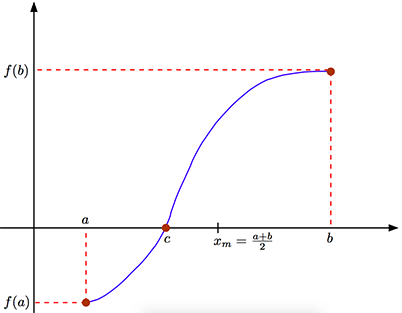
)

$x_{mid} = \frac{x_{low}+x_{up}}{2}$

$|\epsilon_{a}| = |\frac{x_{mid}^{new}-x_{mid}^{old}}{x_{mid}^{new}}| \cdot 100\%$

In [31]:
table = {
    'xlow': [],
    'xup': [],
    'xmid': [],
    'rae': [],
    'f(xlow)': [],
    'f(xmid)': []
}


# ====== Ganti f(x) ======
def f(x):
    return x**2 + 4*x - 12


def bisection(xlow, xup,f, xmidold=9999, rae=9999, iter=0):
    xmid = (xlow + xup)/2
    rae = abs((xmid-xmidold)/xmid)
    f_xlow = f(xlow)
    f_xmid = f(xmid)

    table['xlow'].append(xlow)
    table['xup'].append(xup)
    table['xmid'].append(xmid)
    if iter > 0:
        table['rae'].append(rae)
    else:
        table['rae'].append(999)
    table['f(xlow)'].append(f_xlow)
    table['f(xmid)'].append(f_xmid)

    if iter > 100 or rae < es:
        return xmid

    if f_xlow * f_xmid < 0:
        return bisection(xlow, xmid, xmid, rae, iter+1)
    elif f_xlow * f_xmid > 0:
        return bisection(xmid, xup, xmid, rae, iter+1)

    return xmid


# ====== Ganti Titik Awal ======
xlow = 1
xup = 8
es = 0.005 # 0.5%

result = bisection(xlow, xup,f)

print(result, "\n")
# showGraph(result, 5)
# showGraph(result, 1)
print(pd.DataFrame(table).round(4))

2.0048828125 

     xlow     xup    xmid       rae  f(xlow)  f(xmid)
0  1.0000  8.0000  4.5000  999.0000  -7.0000  26.2500
1  1.0000  4.5000  2.7500    0.6364  -7.0000   6.5625
2  1.0000  2.7500  1.8750    0.4667  -7.0000  -0.9844
3  1.8750  2.7500  2.3125    0.1892  -0.9844   2.5977
4  1.8750  2.3125  2.0938    0.1045  -0.9844   0.7588
5  1.8750  2.0938  1.9844    0.0551  -0.9844  -0.1248
6  1.9844  2.0938  2.0391    0.0268  -0.1248   0.3140
7  1.9844  2.0391  2.0117    0.0136  -0.1248   0.0939
8  1.9844  2.0117  1.9980    0.0068  -0.1248  -0.0156
9  1.9980  2.0117  2.0049    0.0034  -0.0156   0.0391


### False Position Method

Hampir sama dengan Bisection method, tapi kita gunakan rumus $x_{mid}$ yang lebih akurat

Langkah mencari:

0. Tentukan toleransi serta $x_{low}$ dan $x_{high}$ sebagai dugaan awal
1. Hitung titik tengah $x_{mid} = x_{up} - \frac{f(x_{up})(x_{low}-x_{up})}{f(x_{low})-f(x_{up})}$
2. Hitung nilai $f(x_{low}).f(x_{mid})$
- Bila $f(x_{low}).f(x_{mid}) <0$, atur  $x_{high} = x_{mid}$ (Karena $x_{low}<c<x_{mid}$)
- Bila $f(x_{low}).f(x_{mid}) >0$, atur  $x_{low} = x_{mid}$ (Karena $x_{mid}<c<x_{high}$)
3. Hitung $|\epsilon_{a}| = |\frac{x_{mid}^{new}-x_{mid}^{old}}{x_{mid}^{new}}| \cdot 100\%$ . Jika masih lebih dari toleransi, lanjutkan ulang langkah 1

In [34]:
table = {
    'xlow': [],
    'xup': [],
    'xmid': [],
    'rae': [],
    'f(xlow)': [],
    'f(xmid)': []
}


# ====== Ganti f(x) ======
def f(x):
    return x**2 + 4*x - 12


def falsePosition(xlow, xup, xmidold=9999, rae=9999, iter=0):
    xmid = xup - (f(xup)*(xlow-xup))/(f(xlow)-f(xup))
    rae = abs((xmid-xmidold)/xmid)
    f_xlow = f(xlow)
    f_xmid = f(xmid)

    table['xlow'].append(xlow)
    table['xup'].append(xup)
    table['xmid'].append(xmid)
    if iter > 0:
        table['rae'].append(rae)
    else:
        table['rae'].append(999)
    table['f(xlow)'].append(f_xlow)
    table['f(xmid)'].append(f_xmid)

    if iter > 100 or rae < es:
        return xmid

    if f_xlow * f_xmid < 0:
        return falsePosition(xlow, xmid, xmid, rae, iter+1)
    elif f_xlow * f_xmid > 0:
        return falsePosition(xmid, xup, xmid, rae, iter+1)

    return xmid


# ====== Ganti Titik Awal ======
xlow = 1
xup = 8
es = 0.005

result = falsePosition(xlow, xup)

print(result, "\n")
# showGraph(result, 5)
# showGraph(result, 1)
print(pd.DataFrame(table).round(4))

1.9929246656443507 

     xlow  xup    xmid       rae  f(xlow)  f(xmid)
0  1.0000    8  1.5385  999.0000  -7.0000  -3.4793
1  1.5385    8  1.7955    0.1431  -3.4793  -1.5945
2  1.7955    8  1.9110    0.0605  -1.5945  -0.7038
3  1.9110    8  1.9616    0.0258  -0.7038  -0.3055
4  1.9616    8  1.9835    0.0110  -0.3055  -0.1316
5  1.9835    8  1.9929    0.0047  -0.1316  -0.0566


### Fixed Point Iteration

Fixed Point iteration dilakukan dengan membalik persamaan $f(x)=0$ menjadi $x=g(x)$

Misalnya $x^2 + 4x - 12=0$ bisa kita ubah menjadi $x=\frac{12-x^2}{4}$ atau $x=\sqrt{12-4x}$

Algoritmanya adalah:

0. Pilih dugaan awal sembarang $x_0$
1. Ubah $f(x)=0$ menjadi $x=g(x)$ secara manual
2. Masukkan $x_{i+1}=g(x_i)$
3. Ulangi langkah 2 sampai konvergen

Jika ternyata setelah dilakukan iterasi, angkanya menjadi divergen (to infinity and beyond), coba masukkan fungsi $g(x)$ yang berbeda

In [39]:
table = {
    'xi': [],
    'f(xi)': []
}

# ====== ganti f(x) ======


def f(x):
    return 2*(x**3) - 11.7*(x**2) + 17.7*x - 5


# ====== ganti g(x)
def g(x):
    return ((11.7*(x**2) - 17.7*x + 5)/2)**(1/3)


def fixedPointIteration(xi, iter=0):
    f_xi = f(xi)

    table['xi'].append(xi)
    table['f(xi)'].append(f_xi)

    xii = g(xi)

    if iter < 100 and abs(f_xi) >= es:
        return fixedPointIteration(xii, iter+1)

    return xi


x0 = 3

result = fixedPointIteration(x0)

print(result, "\n")
print(pd.DataFrame(table))

3.562695142175923 

          xi     f(xi)
0   3.000000 -3.200000
1   3.058126 -3.091133
2   3.112250 -2.949416
3   3.162194 -2.782441
4   3.207907 -2.597848
5   3.249441 -2.402806
6   3.286934 -2.203666
7   3.320583 -2.005757
8   3.350628 -1.813321
9   3.377335 -1.629544
10  3.400979 -1.456648
11  3.421840 -1.296029
12  3.440189 -1.148398
13  3.456286 -1.013933
14  3.470375 -0.892403
15  3.482681 -0.783288
16  3.493411 -0.685873
17  3.502753 -0.599327
18  3.510875 -0.522756
19  3.517930 -0.455254
20  3.524050 -0.395929
21  3.529355 -0.343930
22  3.533951 -0.298455
23  3.537930 -0.258765
24  3.541372 -0.224182
25  3.544349 -0.194092
26  3.546922 -0.167945
27  3.549145 -0.145249
28  3.551066 -0.125567
29  3.552725 -0.108512
30  3.554157 -0.093743
31  3.555394 -0.080963
32  3.556461 -0.069908
33  3.557382 -0.060350
34  3.558176 -0.052090
35  3.558862 -0.044954
36  3.559453 -0.038790
37  3.559964 -0.033468
38  3.560404 -0.028873
39  3.560783 -0.024907
40  3.561111 -0.021484
41  3.561393 -

### Newton Raphson Method

![](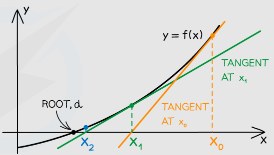
)

Metode Newton-Raphson dapat digambarkan seperti grafik di atas.

Dari persamaan garis linear, kita tahu bahwa garis tangent dapat ditulis $y-y_1=m(x-x_1)$

Sehingga garis tangensial dapat ditulis $f(x_i)-0=f'(x_i)(x_i-x_{i+1})$ atau $x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}$

Langkah Newton Raphson

0. Cari bentuk $f'(x)$ secara manual dari $f(x)$
1. Masukkan dugaan awal x_0, toleransi, dsb.
2. Hitung $x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}$
3. Ulangi langkah 2 sampai konvergen

Bila hasilnya ternyata divergen, coba ganti dugaan awal

$x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}$

$|\epsilon_{a}| = |\frac{x_{i+1}-x_{i}}{x_{i+1}}| \cdot 100\% $

In [41]:
table = {
    'xi': [],
    'xi+1': [],
    'rae': [],
    'f(xi)': [],
    "f'(xi)": []
}


# ====== Ganti f(x) ======
def f(x):
    return 9.34-21.97*x+16.3*(x**2)-3.704*(x**3)


# ====== Ganti f'(x) ======
def fa(x):
    return -21.97 + 32.6*x - 3*3.704*(x**2)


def newtonRaphson(xi, rae=9999, iter=0):
    xii = xi - f(xi)/fa(xi)
    rae = abs((xii-xi)/xii)

    table['xi'].append(xi)
    table['xi+1'].append(xii)
    table['rae'].append(rae)
    table['f(xi)'].append(f(xi))
    table["f'(xi)"].append(fa(xi))

    if iter < 100 and rae >= es:
        return newtonRaphson(xii, rae, iter+1)

    return xii


# ====== Ganti Titik Awal ======
x0 = 0.5
es = 0.005

result = newtonRaphson(x0)

print(result, "\n")
# showGraph(result, 10)
# showGraph(result, 1)
print(pd.DataFrame(table).round(4))

0.9534642694341398 

       xi    xi+1     rae   f(xi)  f'(xi)
0  0.5000  0.7328  0.3177  1.9670 -8.4480
1  0.7328  0.8652  0.1530  0.5357 -4.0472
2  0.8652  0.9297  0.0694  0.1343 -2.0826
3  0.9297  0.9509  0.0223  0.0268 -1.2664
4  0.9509  0.9535  0.0027  0.0026 -1.0186


### Secant Method

Hampir sama dengan Newton Raphson, namun kita tidak perlu mencari turunan secara manual, karena $f'(x) \approx \frac{f(x_{i-1})-f(x_{i})}{x_{i-1}-x_{i}}$

Artinya, kita butuh dua dugaan awal $x_0$ dan $x_1$

Langkah Secant Method

1. Masukkan dugaan awal $x_0$ dan $x_1$, toleransi, dsb.
2. Hitung $x_{i+1} = x_{i} - \frac{f(x_{i})(x_{i-1}-x_{i})}{f(x_{i-1})-f(x_{i})}$
3. Ulangi langkah 2 sampai konvergen

In [51]:
table = {
    'x': [],
    'xi': [],
    'xi+1': [],
    'rae': [],
    "f(xi)": [],
    "f(xi-1)": [],
    "xi-1 - xi": [], 
}


# ====== Ganti f(x) ======
def f(x):
    return 9.34-21.97*x+16.3*(x**2)-3.704*(x**3)


def secant(x, xi, rae=9999, iter=0):
    xii = xi - (f(xi)*(x-xi))/(f(x)-f(xi))
    rae = abs((xii-xi)/xii)

    table['x'].append(x)
    table['xi'].append(xi)
    table['xi+1'].append(xii)
    table['rae'].append(rae)
    table['f(xi-1)'].append(f(x))
    table['f(xi)'].append(f(xi))
    table['xi-1 - xi'].append(x - xi)

    if iter < 100 and rae >= es:
        return secant(xi, xii, rae, iter+1)

    return xii


# ====== Ganti Titik Awal ======
x99 = 1.05
x0 = 0.5
es = 0.005

result = secant(x99, x0)

print(result, "\n")
# showGraph(result, 10)
# showGraph(result, 1)
print(pd.DataFrame(table).round(4))

0.953676344858943 

        x      xi    xi+1     rae   f(xi)  f(xi-1)  xi-1 - xi
0  1.0500  0.5000  1.0375  0.5181  1.9670  -0.0456     0.5500
1  0.5000  1.0375  1.0255  0.0117 -0.0450   1.9670    -0.5375
2  1.0375  1.0255  0.7666  0.3378 -0.0430  -0.0450     0.0120
3  1.0255  0.7666  1.0009  0.2341  0.4082  -0.0430     0.2589
4  0.7666  1.0009  0.9826  0.0185 -0.0344   0.4082    -0.2343
5  1.0009  0.9826  0.9403  0.0450 -0.0241  -0.0344     0.0182
6  0.9826  0.9403  0.9559  0.0163  0.0140  -0.0241     0.0423
7  0.9403  0.9559  0.9537  0.0023 -0.0023   0.0140    -0.0156


### Modified Secant Method

Hampir sama dengan Secant Method, tapi kita gunakan $x_{i+1} = x_{i} - \frac{\delta x_i f(x_i)}{f((1+\delta)x_{i})-f(x_{i})}$ . Dugaan awal kedua kita ganti dengan nilai $\delta$

In [67]:
table = {
    'xi': [],
    'xi+1': [],
    'rae': [],
    'dxi': [],
    'xi + dxi': [],
    'f(xi)': [],
    'f(xi + dxi)': [],
}


# ====== Ganti f(x) ======
def f(x):
    return 9.34-21.97*x+16.3*(x**2)-3.704*(x**3)


def modifiedSecant(xi, d, rae=9999, iter=0):
#     print(f(xi+d*xi))
    xii = xi - (d*xi*f(xi))/(f(xi+d*xi)-f(xi))
    rae = abs((xii-xi)/xii)

    table['xi'].append(xi)
    table['xi+1'].append(xii)
    table['rae'].append(rae)
    table['dxi'].append(d*xi)
    table['xi + dxi'].append(xi+d*xi)
    table['f(xi)'].append(f(xi))
    table['f(xi + dxi)'].append(f(xi + d*xi))

    if iter < 100 and rae >= es:
        return modifiedSecant(xii, d, rae, iter+1)

    return xii


# ====== Ganti Titik Awal ======
x0 = 0.8
d = 0.01
es = 0.00005

result = modifiedSecant(x0, d)

print(result, "\n")
# showGraph(result, 10)
# showGraph(result, 1)
print(pd.DataFrame(table).round(4))

0.9535008809684246 

       xi    xi+1     rae     dxi  xi + dxi   f(xi)  f(xi + dxi)
0  0.8000  0.9018  0.1129  0.0080    0.8080  0.2996       0.2760
1  0.9018  0.9449  0.0456  0.0090    0.9108  0.0669       0.0529
2  0.9449  0.9535  0.0091  0.0094    0.9543  0.0089      -0.0008
3  0.9535  0.9535  0.0000  0.0095    0.9631 -0.0000      -0.0089
